In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

In [2]:
data = pd.read_csv("IE - MBD - Marketing Intelligence - Home Exam Dataset.csv")

In [3]:
data.columns

Index(['Date', 'Channel', 'Device Category', 'Age', 'Gender', 'Users',
       'Sessions', 'Pageviews', 'Bounces', 'Time on Page', ' Leads'],
      dtype='object')

In [4]:
data.head(1)

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads
0,20170522,Direct,desktop,25-34,female,2380,5605,150245,213,3805044,3


## Prelim exploration

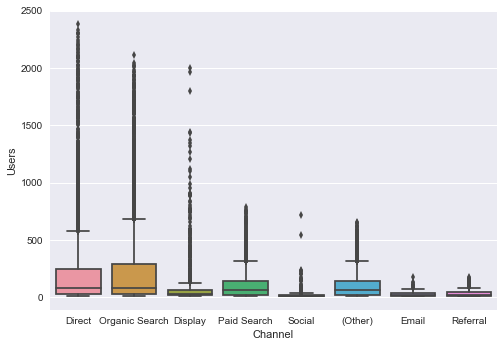

In [5]:
sns.boxplot(x='Channel', y='Users', data=data)


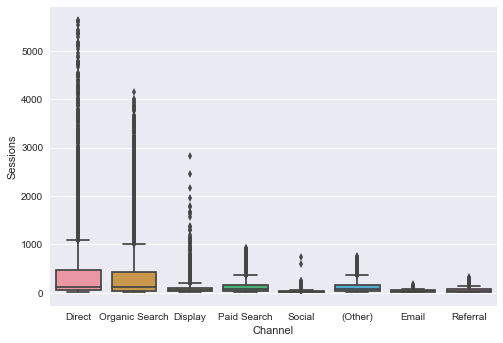

In [6]:
sns.boxplot(x='Channel', y='Sessions', data=data)

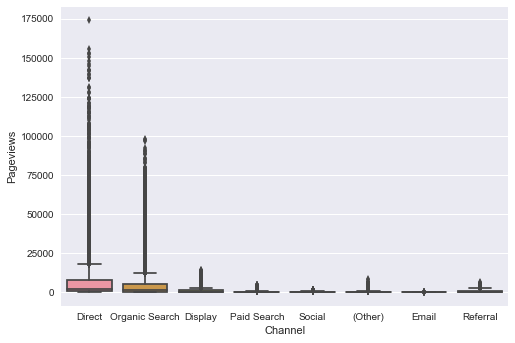

In [7]:
sns.boxplot(x='Channel', y='Pageviews', data=data)

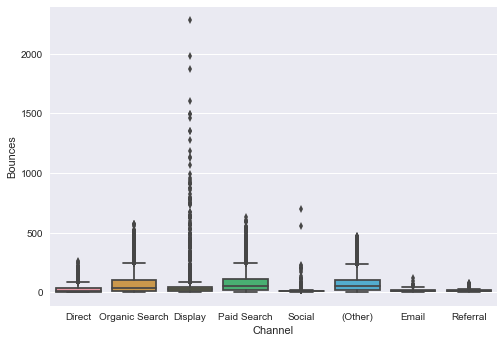

In [8]:
sns.boxplot(x='Channel', y='Bounces', data=data)

In [9]:
data['Datetime'] = pd.to_datetime(data.Date, format = '%Y%m%d')

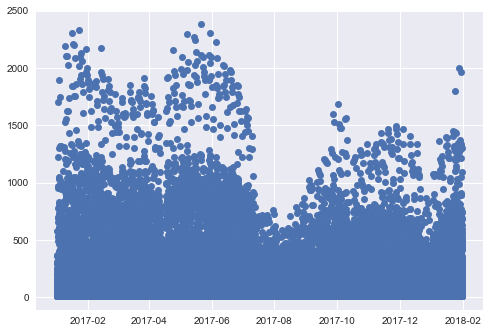

In [10]:
plt.plot_date(data.Datetime, data.Users)

In [11]:
data.Date.value_counts()

20170524    190
20180124    186
20170220    185
20170321    184
20170320    180
20170222    179
20170314    179
20170525    179
20170221    178
20170327    178
20170227    178
20170223    177
20180129    177
20170317    176
20170209    176
20170315    176
20180126    176
20170215    176
20180125    176
20180130    176
20170219    175
20170322    175
20170328    175
20170218    175
20170228    175
20170323    174
20170313    174
20170224    173
20170307    173
20170216    173
           ... 
20171007    122
20171104    122
20171210    122
20180107    122
20171111    122
20171208    122
20171028    122
20170805    121
20171221    120
20171105    120
20171226    120
20171217    119
20170807    119
20171112    118
20170101    118
20171209    118
20171227    118
20171222    116
20171228    116
20171229    114
20171118    114
20180106    114
20170806    112
20171216    107
20171230    107
20171223    103
20171225     99
20171231     99
20180101     93
20171224     92
Name: Date, Length: 396,

In [12]:
df = data.copy()

In [13]:
df = df.sort_values(by='Date')

In [14]:
df.head()

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,Datetime
22544,20170101,Organic Search,desktop,18-24,male,82,117,1874,19,46099,4,2017-01-01
31396,20170101,(Other),mobile,45-54,male,45,49,50,46,775,2,2017-01-01
36966,20170101,(Other),desktop,55-64,female,32,36,124,27,1130,0,2017-01-01
52307,20170101,Referral,desktop,25-34,female,13,19,346,4,8385,0,2017-01-01
52306,20170101,Organic Search,tablet,45-54,male,13,16,79,3,3099,1,2017-01-01


In [15]:
df.columns

Index(['Date', 'Channel', 'Device Category', 'Age', 'Gender', 'Users',
       'Sessions', 'Pageviews', 'Bounces', 'Time on Page', ' Leads',
       'Datetime'],
      dtype='object')

## Adding metrics
given:
- Conversion rate (goals/sessions)
- Bounce rate (bounces/sessions)
- Pageviews per session (pageviews/session)

selfmade:
- TimeSession (Time on page / sessions)
- 

In [16]:
df['ConversionRate'] = df[' Leads'] / df['Sessions']
df['BounceRate'] = df['Bounces'] / df['Sessions']
df['PageViewsSession'] = df['Pageviews'] / df['Sessions']
df['TimeSession'] = df['Time on Page'] / df['Sessions']

In [17]:
df.columns

Index(['Date', 'Channel', 'Device Category', 'Age', 'Gender', 'Users',
       'Sessions', 'Pageviews', 'Bounces', 'Time on Page', ' Leads',
       'Datetime', 'ConversionRate', 'BounceRate', 'PageViewsSession',
       'TimeSession'],
      dtype='object')

In [18]:
df['uniques'] = df['Channel'] + df['Device Category'] + df['Age'].astype(str) + df['Gender']

In [19]:
df.head()

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,Datetime,ConversionRate,BounceRate,PageViewsSession,TimeSession,uniques
22544,20170101,Organic Search,desktop,18-24,male,82,117,1874,19,46099,4,2017-01-01,0.034188,0.162393,16.017094,394.008547,Organic Searchdesktop18-24male
31396,20170101,(Other),mobile,45-54,male,45,49,50,46,775,2,2017-01-01,0.040816,0.938776,1.020408,15.816327,(Other)mobile45-54male
36966,20170101,(Other),desktop,55-64,female,32,36,124,27,1130,0,2017-01-01,0.000000,0.750000,3.444444,31.388889,(Other)desktop55-64female
52307,20170101,Referral,desktop,25-34,female,13,19,346,4,8385,0,2017-01-01,0.000000,0.210526,18.210526,441.315789,Referraldesktop25-34female
52306,20170101,Organic Search,tablet,45-54,male,13,16,79,3,3099,1,2017-01-01,0.062500,0.187500,4.937500,193.687500,Organic Searchtablet45-54male


In [187]:
df.columns

Index(['Date', 'Channel', 'Device Category', 'Age', 'Gender', 'Users',
       'Sessions', 'Pageviews', 'Bounces', 'Time on Page', ' Leads',
       'Datetime', 'ConversionRate', 'BounceRate', 'PageViewsSession',
       'TimeSession', 'uniques'],
      dtype='object')

In [21]:
counts = df.groupby('Date')['Device Category'].value_counts().to_frame('counts').reset_index()

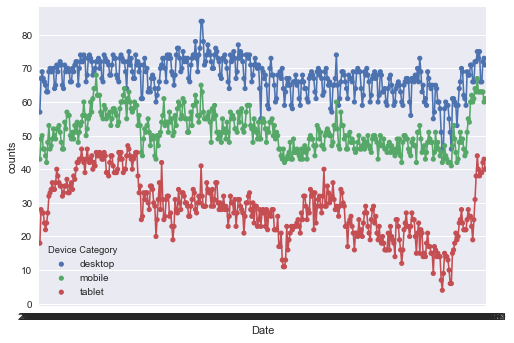

In [22]:
sns.pointplot(x='Date', y='counts', hue='Device Category', data=counts, scale=0.5)

## Most Effective Device

In [23]:
df.columns

Index(['Date', 'Channel', 'Device Category', 'Age', 'Gender', 'Users',
       'Sessions', 'Pageviews', 'Bounces', 'Time on Page', ' Leads',
       'Datetime', 'ConversionRate', 'BounceRate', 'PageViewsSession',
       'TimeSession', 'uniques'],
      dtype='object')

In [174]:
#mean based
device_ratios = df.groupby('Device Category')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].mean()
device_ratios['counts'] = df['Device Category'].value_counts()
device_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession,counts
Device Category,,,,,,,,,
desktop,4.068401,0.022559,63.339124,0.387898,5574.771808,11.798924,151126.919730,342.046281,26710
mobile,3.413122,0.019763,68.910490,0.497216,1330.516894,5.420076,33230.829096,139.460916,20333
tablet,0.508887,0.018356,12.662727,0.477048,317.335229,7.718147,7023.759332,181.905088,11252


In [175]:
#median based
device_ratios = df.groupby('Device Category')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].median()
device_ratios['counts'] = df['Device Category'].value_counts()
device_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession,counts
Device Category,,,,,,,,,
desktop,2.0,0.014409,36.0,0.361111,892.0,11.136603,28770.5,336.346354,26710
mobile,1.0,0.013245,39.0,0.545455,291.0,3.384615,8801.0,106.375000,20333
tablet,0.0,0.000000,10.0,0.476190,120.0,5.390097,3485.0,156.216899,11252


In [26]:
datedf = df.groupby(by=['Date', 'Device Category'])['Sessions'].sum().to_frame('sums').reset_index()

In [27]:
datedf.head()

,Date,Device Category,sums
0,20170101,desktop,8126
1,20170101,mobile,3814
2,20170101,tablet,468
3,20170102,desktop,30548
4,20170102,mobile,7433


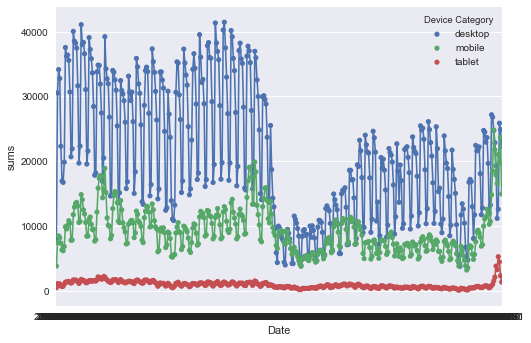

In [28]:
sns.pointplot(x='Date', y='sums', hue='Device Category', data=datedf, scale=0.5)

## Most Effective Channel

In [168]:
#mean
channel_ratios = df.groupby('Channel')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].mean()
channel_ratios['counts'] = df.Channel.value_counts()
channel_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession,counts
Channel,,,,,,,,,
(Other),3.513751,0.025046,74.095422,0.699454,399.971323,2.993331,15247.798004,110.702257,11926
Direct,1.206436,0.005274,27.780727,0.122721,8415.550004,16.301601,209194.921502,366.033261,11529
Display,1.235487,0.017870,43.008786,0.551557,901.352455,9.930518,23791.229113,255.905342,5805
Email,4.451220,0.123173,20.256098,0.489211,79.024390,2.148591,7577.243902,209.029270,82
Organic Search,5.495956,0.018656,71.186359,0.275434,5471.744101,11.819871,151682.954557,325.441530,11993
Paid Search,4.546556,0.035211,77.750456,0.687730,310.887208,2.341727,11978.657799,93.907369,10976
Referral,0.827708,0.017992,12.154156,0.277484,783.746096,12.665579,24199.012846,398.233497,3970
Social,0.664846,0.027779,12.300894,0.440183,172.814796,6.453296,6082.126614,228.834649,2014


In [167]:
#median
channel_ratios = df.groupby('Channel')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].median()
channel_ratios['counts'] = df.Channel.value_counts()
channel_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession,counts
Channel,,,,,,,,,
(Other),2.0,0.020833,50.0,0.718246,150.0,1.706919,5990.0,76.424812,11926
Direct,0.0,0.000000,14.0,0.094737,1909.0,15.526316,40607.0,326.722222,11529
Display,1.0,0.001757,23.0,0.572917,335.0,7.812500,8532.0,192.680000,5805
Email,3.5,0.116516,14.0,0.474937,56.5,1.901613,5744.5,185.893571,82
Organic Search,2.0,0.013853,32.0,0.251534,1210.0,10.621622,32997.0,290.076923,11993
Paid Search,2.0,0.033058,48.0,0.688060,137.0,1.787979,5499.5,81.373741,10976
Referral,0.0,0.000000,9.0,0.250000,429.0,12.435417,14523.5,399.066169,3970
Social,0.0,0.000000,8.0,0.425000,92.0,3.833333,3119.5,138.017045,2014


In [170]:
date_channeldf = df.groupby(by=['Date', 'Channel'])['Sessions'].sum().to_frame('sums').reset_index()

In [172]:
date_channeldf.head()

,Date,Channel,sums
0,20170101,(Other),1718
1,20170101,Direct,5442
2,20170101,Display,207
3,20170101,Organic Search,3629
4,20170101,Paid Search,1334


In [140]:
channeldf = date_channeldf.drop(['Date'], axis=1)

In [165]:
df.Channel.value_counts()

Organic Search    11993
(Other)           11926
Direct            11529
Paid Search       10976
Display            5805
Referral           3970
Social             2014
Email                82
Name: Channel, dtype: int64

In [163]:
channeldf.Channel.value_counts()

(Other)           396
Organic Search    396
Direct            396
Referral          396
Display           396
Paid Search       396
Social            353
Email              12
Name: Channel, dtype: int64

In [161]:
channeldf.loc[channeldf['Channel'] == 'Email', :]

,Channel,sums
1001,Email,1058
1009,Email,1083
1017,Email,251
1025,Email,73
1033,Email,15
1048,Email,20
1056,Email,29
1064,Email,14
1107,Email,37
1830,Email,579


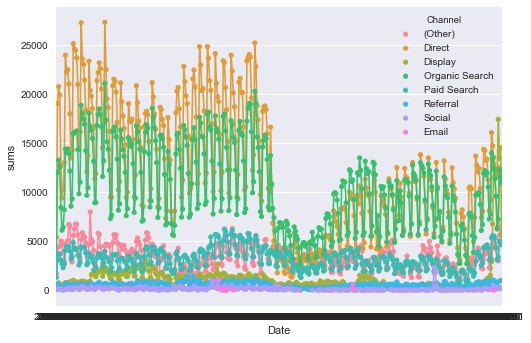

In [33]:
sns.pointplot(x='Date', y='sums', hue='Channel', data=date_channeldf, scale=0.5)

## Most Effective Ages

In [191]:
#mean
channel_ratios = df.groupby('Age')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].mean()
channel_ratios['counts'] = df.Age.value_counts()
channel_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession,counts
Age,,,,,,,,,
18-24,2.659051,0.020579,56.404593,0.458613,3048.377666,8.912004,82344.751136,247.577006,8579
25-34,6.348255,0.025121,91.984619,0.393124,6067.883105,9.468047,164279.312475,266.205808,12353
35-44,4.179370,0.023564,67.443667,0.399307,4084.121858,9.464081,106743.194338,255.897410,12293
45-54,1.902572,0.019501,40.657383,0.437751,1818.355292,8.845033,47752.295892,236.898358,10808
55-64,0.928396,0.016683,28.070042,0.504846,711.634508,7.404149,18980.324448,201.971206,8966
65+,0.433535,0.013979,17.949207,0.544063,411.293429,7.639871,10773.669940,205.643765,5296


In [136]:
#median
channel_ratios = df.groupby('Age')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].median()
channel_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession
Age,,,,,,,,
18-24,1.0,0.012821,34.0,0.466667,388.0,6.360825,12276.0,177.600858
25-34,2.0,0.017544,46.0,0.353896,811.0,7.923077,26059.0,212.476923
35-44,2.0,0.015464,37.0,0.368421,697.0,7.769231,21062.0,208.545455
45-54,1.0,0.010488,26.0,0.426006,373.0,6.834475,11459.0,183.993307
55-64,0.0,0.000000,18.0,0.578363,167.0,4.282642,5452.5,134.492857
65+,0.0,0.000000,12.0,0.666667,77.0,2.363636,2688.0,104.124402


In [188]:
agecounts = df.groupby(by=['Date', 'Age'])['Sessions'].sum().to_frame('counts').reset_index()

In [189]:
agecounts.columns

Index(['Date', 'Age', 'counts'], dtype='object')

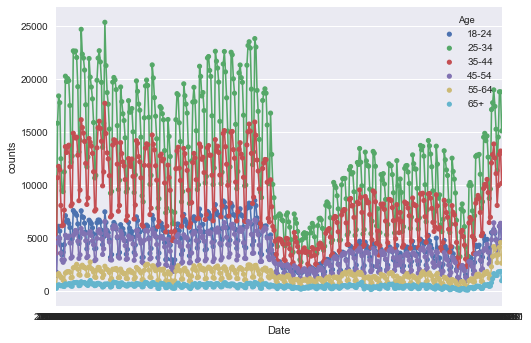

In [190]:
sns.pointplot(x='Date', y='counts', hue='Age', data=agecounts, scale=0.5)

## Most effective Gender

In [192]:
#mean
channel_ratios = df.groupby('Gender')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].mean()
channel_ratios['counts'] = df.Gender.value_counts()
channel_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession,counts
Gender,,,,,,,,,
female,3.804242,0.021408,62.721729,0.428565,3999.568264,9.421353,105372.466645,254.140114,30880
male,2.419004,0.020057,47.367463,0.459760,2043.390224,8.071089,56079.228306,225.083506,27415


In [137]:
#median
channel_ratios = df.groupby('Gender')[' Leads', 'ConversionRate', 'Bounces', 'BounceRate', 'Pageviews', 'PageViewsSession', 'Time on Page', 'TimeSession'].median()
channel_ratios

,Leads,ConversionRate,Bounces,BounceRate,Pageviews,PageViewsSession,Time on Page,TimeSession
Gender,,,,,,,,
female,1,0.011765,26,0.406739,503,7.333333,15259,194.570953
male,1,0.010638,24,0.468085,323,5.700000,10239,171.157895


In [193]:
gendercounts = df.groupby(by=['Date', 'Gender'])['Sessions'].sum().to_frame('counts').reset_index()

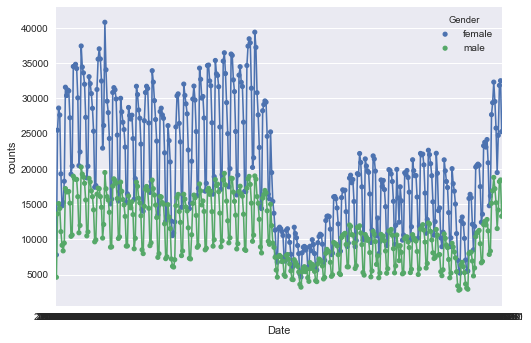

In [195]:
sns.pointplot(x='Date', y='counts', hue='Gender', data=gendercounts, scale=0.5)

# Modelling
## first linear model

In [34]:
from sklearn.linear_model import LinearRegression

X = df.loc[:,['Date', 'Channel', 'Device Category', 'Age', 'Gender']]
y = df[' Leads']

X = pd.get_dummies(X)

In [35]:
lm = LinearRegression()

model = lm.fit(X, y)

In [36]:
coeffs = pd.DataFrame(model.coef_, index=X.columns, columns = ['Coeffs']).sort_values(by='Coeffs', ascending=False)
coeffs

,Coeffs
Age_25-34,4.377648
Channel_Organic Search,3.966557
Channel_Paid Search,2.686305
Device Category_desktop,2.410459
Age_35-44,2.212799
Channel_(Other),2.192900
Gender_female,0.882428
Device Category_mobile,0.800717
Channel_Email,0.756524
Date,0.000067


## Second linear model

In [38]:
from sklearn.linear_model import LinearRegression

X2 = df.loc[:,['Date', 'Channel', 'Device Category', 'Age', 'Gender', 'uniques']]
y = df[' Leads']

X2 = pd.get_dummies(X2)

In [39]:
X2.shape

(58295, 268)

In [40]:
lm = LinearRegression()

model = lm.fit(X2, y)

In [133]:
pd.set_option('display.max_rows', 30)

coeffs2 = pd.DataFrame(model.coef_, index=X2.columns, columns = ['Coeffs']).sort_values(by='Coeffs', ascending=False)
coeffs2

,Coeffs
uniques_Organic Searchdesktop25-34female,17.020119
uniques_Organic Searchmobile25-34female,14.533369
uniques_Paid Searchdesktop25-34female,10.831501
uniques_Paid Searchmobile25-34female,8.077074
uniques_Organic Searchdesktop25-34male,8.007025
uniques_(Other)mobile25-34female,6.867760
uniques_(Other)mobile35-44female,5.979810
uniques_Organic Searchmobile35-44female,5.428247
uniques_Organic Searchdesktop35-44female,5.356917
uniques_Paid Searchmobile35-44female,4.805286


## Linear Model 3

In [37]:
df.head()

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,Datetime,ConversionRate,BounceRate,PageViewsSession,TimeSession,uniques
22544,20170101,Organic Search,desktop,18-24,male,82,117,1874,19,46099,4,2017-01-01,0.034188,0.162393,16.017094,394.008547,Organic Searchdesktop18-24male
31396,20170101,(Other),mobile,45-54,male,45,49,50,46,775,2,2017-01-01,0.040816,0.938776,1.020408,15.816327,(Other)mobile45-54male
36966,20170101,(Other),desktop,55-64,female,32,36,124,27,1130,0,2017-01-01,0.000000,0.750000,3.444444,31.388889,(Other)desktop55-64female
52307,20170101,Referral,desktop,25-34,female,13,19,346,4,8385,0,2017-01-01,0.000000,0.210526,18.210526,441.315789,Referraldesktop25-34female
52306,20170101,Organic Search,tablet,45-54,male,13,16,79,3,3099,1,2017-01-01,0.062500,0.187500,4.937500,193.687500,Organic Searchtablet45-54male


In [239]:
from sklearn.linear_model import LinearRegression

X3 = df.loc[:,['Date','Channel', 'Device Category', 'Age', 'Gender', 
               'BounceRate']]
y = df[' Leads']

X3 = pd.get_dummies(X3)

In [240]:
lm = LinearRegression()

model = lm.fit(X3, y)

In [241]:
pd.set_option('display.max_rows', 30)

coeffs3 = pd.DataFrame(model.coef_, index=X3.columns, columns = ['Model 3 - Coeffs']).sort_values(by='Model 3 - Coeffs', ascending=False)
coeffs3

,Model 3 - Coeffs
Age_25-34,4.544122
Channel_Organic Search,4.495665
BounceRate,2.759644
Device Category_desktop,2.630921
Age_35-44,2.373835
Channel_Paid Search,2.064129
Channel_(Other),1.572366
Gender_female,0.932762
Device Category_mobile,0.704783
Channel_Email,0.583359


## Tree model

In [76]:
X3 = df.loc[:,['Channel', 'Device Category', 'Age', 'Gender']]
y = df[' Leads']

X3 = pd.get_dummies(X3)

In [64]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

### best max_depth

In [78]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(3, 10)
}

tree_model = GridSearchCV(DTR, params)

gstree = tree_model.fit(X3, y)

In [80]:
gstree.best_params_

{'max_depth': 9}

In [196]:
#model
tree = DecisionTreeRegressor(max_depth=9).fit(X3, y)

In [197]:
coeffs3 = pd.DataFrame(tree.feature_importances_, index=X3.columns, columns = ['Coeffs']).sort_values(by='Coeffs', ascending=False)
coeffs3

,Coeffs
Device Category_tablet,0.253515
Channel_Organic Search,0.167319
Age_25-34,0.131825
Channel_Paid Search,0.094573
Channel_(Other),0.090163
Gender_female,0.087922
Age_35-44,0.049160
Gender_male,0.034607
Device Category_desktop,0.030509
Device Category_mobile,0.025971


In [125]:
tree.tree_

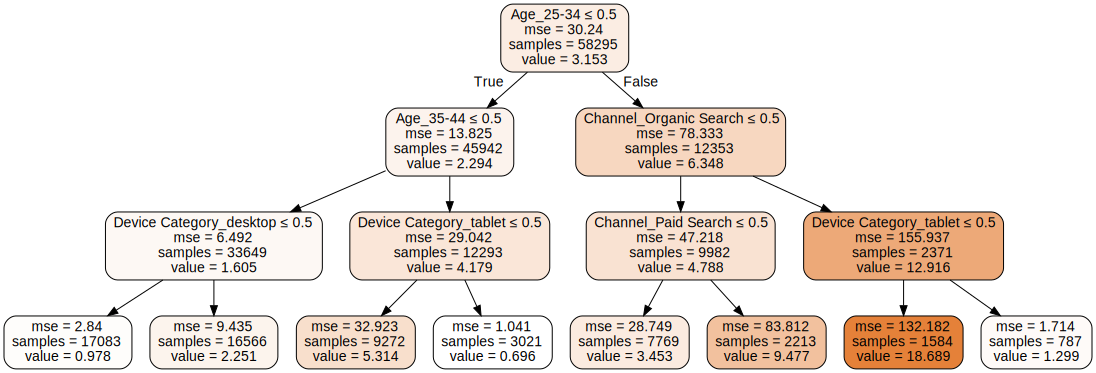

In [121]:
#plot
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=X3.columns,   
                         filled=True, rounded=True,  
                         special_characters=True, max_depth = 3)  
graph = graphviz.Source(dot_data)  
graph



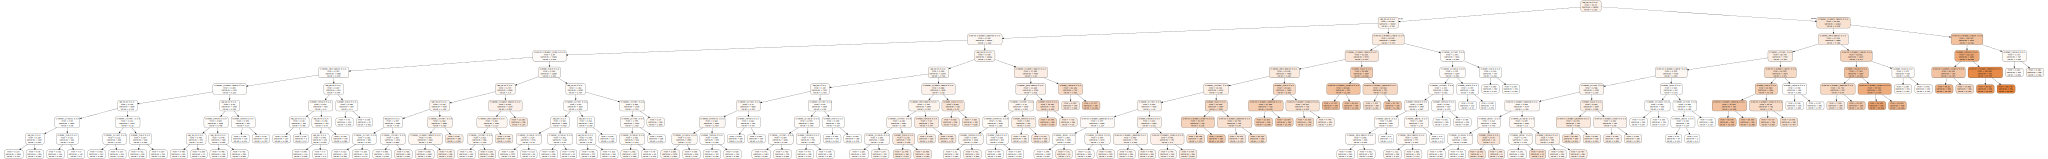

In [198]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=X3.columns,   
                         filled=True, rounded=True,  
                         special_characters=True, max_depth=9)  
graph = graphviz.Source(dot_data)  
graph

In [199]:
dot_data = export_graphviz(tree, out_file='tree3.dot', 
                         feature_names=X3.columns,   
                         filled=True, rounded=True,  
                         special_characters=True, max_depth=9)  

## Tree model 2 - randomforest

In [95]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_depth = 4)

tree2 = rf.fit(X3, y)

In [96]:
coeffs4 = pd.DataFrame(tree2.feature_importances_, index=X3.columns, columns = ['Coeffs']).sort_values(by='Coeffs', ascending=False)
coeffs4

,Coeffs
Device Category_tablet,0.297403
Channel_Organic Search,0.216114
Age_25-34,0.183212
Channel_Paid Search,0.075617
Age_35-44,0.068274
Channel_(Other),0.055981
Gender_male,0.036491
Gender_female,0.034784
Device Category_desktop,0.014579
Age_18-24,0.013001


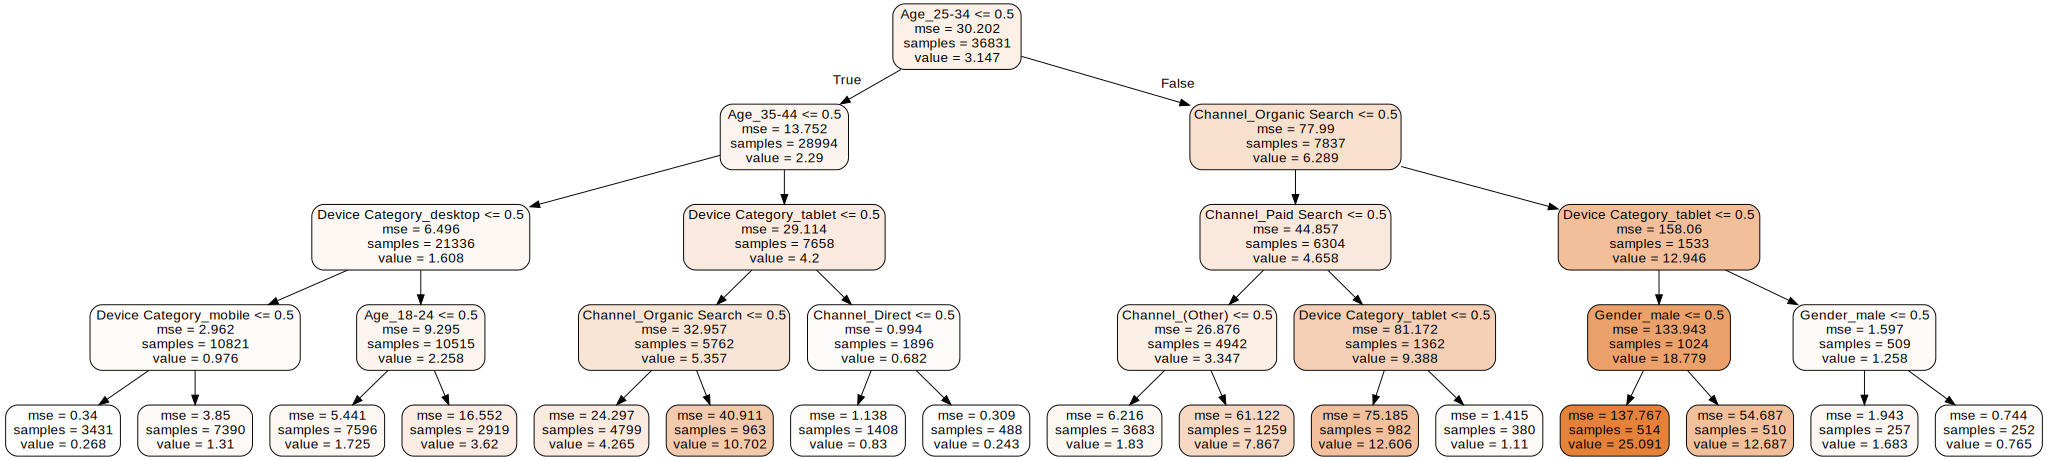

In [97]:
#plot
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree2.estimators_[0], out_file=None, 
                         feature_names=X3.columns,   
                         filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

In [242]:
df.head()

,Date,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,Datetime,ConversionRate,BounceRate,PageViewsSession,TimeSession,uniques
22544,20170101,Organic Search,desktop,18-24,male,82,117,1874,19,46099,4,2017-01-01,0.034188,0.162393,16.017094,394.008547,Organic Searchdesktop18-24male
31396,20170101,(Other),mobile,45-54,male,45,49,50,46,775,2,2017-01-01,0.040816,0.938776,1.020408,15.816327,(Other)mobile45-54male
36966,20170101,(Other),desktop,55-64,female,32,36,124,27,1130,0,2017-01-01,0.000000,0.750000,3.444444,31.388889,(Other)desktop55-64female
52307,20170101,Referral,desktop,25-34,female,13,19,346,4,8385,0,2017-01-01,0.000000,0.210526,18.210526,441.315789,Referraldesktop25-34female
52306,20170101,Organic Search,tablet,45-54,male,13,16,79,3,3099,1,2017-01-01,0.062500,0.187500,4.937500,193.687500,Organic Searchtablet45-54male
